### Assignment-06 MLR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('ToyotaCorolla.csv')

### EDA

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.

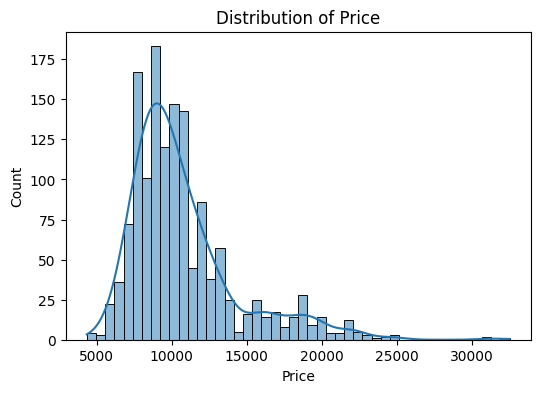

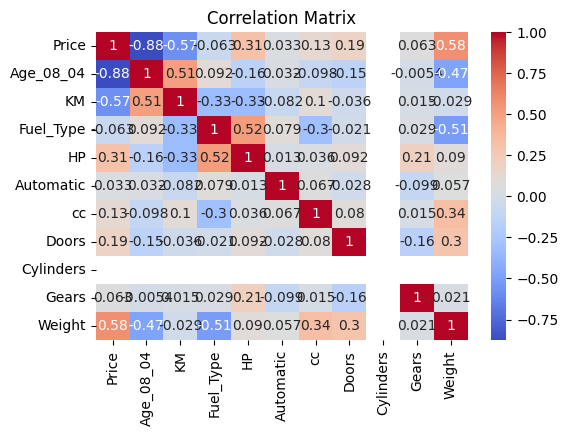

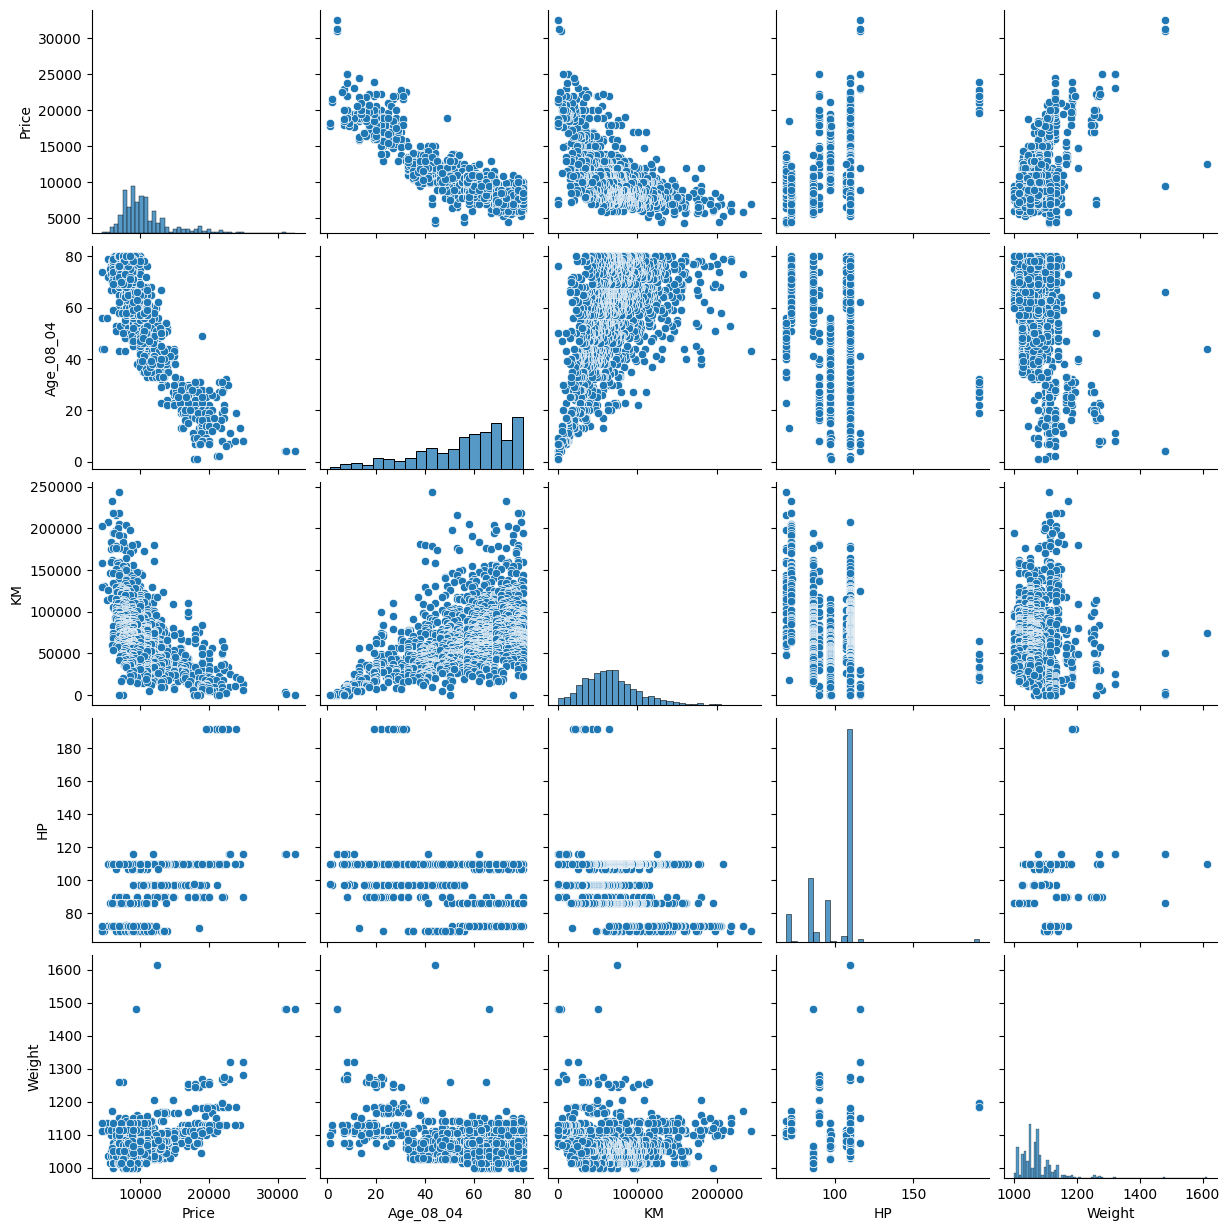

In [4]:
# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data types of columns
print(df.dtypes)

# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(6, 4))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Encode the 'Fuel_Type' column into numerical values
df['Fuel_Type'] = df['Fuel_Type'].map({'Diesel': 0, 'Petrol': 1, 'CNG': 2})

# Correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected variables
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'Weight']])
plt.show()

### Data Preprocessing

In [5]:
# Define features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical features
numerical_features = ['Age_08_04', 'KM', 'HP', 'Weight']
categorical_features = ['Fuel_Type', 'Automatic', 'Doors']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the preprocessing to the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Build MLR Model

In [6]:
# Model 1: Simple Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Model 2: Lasso Regression
model2 = Lasso(alpha=0.01)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# Model 3: Ridge Regression
model3 = Ridge(alpha=0.01)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

C:\Users\kavya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+07, tolerance: 1.503e+06
  model = cd_fast.enet_coordinate_descent(


### Evaluate the Models

In [7]:
# Function to evaluate the models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}')
    print(f'{model_name} - R-squared: {r2}')

# Evaluate Model 1
evaluate_model(y_test, y_pred1, 'Linear Regression')

# Evaluate Model 2
evaluate_model(y_test, y_pred2, 'Lasso Regression')

# Evaluate Model 3
evaluate_model(y_test, y_pred3, 'Ridge Regression')

Linear Regression - Mean Squared Error: 2253757.0425011525
Linear Regression - R-squared: 0.8310880079942958
Lasso Regression - Mean Squared Error: 2253716.0398689336
Lasso Regression - R-squared: 0.8310910810124407
Ridge Regression - Mean Squared Error: 2253661.369802439
Ridge Regression - R-squared: 0.8310951783617381


### Interpret the coefficients

In [8]:
# Get the coefficients for the Linear Regression model
coefficients = model1.coef_
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)

        Feature  Coefficient
0     Age_08_04 -2258.327924
1            KM  -599.607184
2            HP   201.706912
3        Weight  1381.295064
4   Fuel_Type_0  -580.156384
5   Fuel_Type_1  1044.937544
6   Fuel_Type_2  -464.781160
7   Automatic_0    -7.458350
8   Automatic_1     7.458350
9       Doors_2   370.049186
10      Doors_3  -143.062846
11      Doors_4   104.568091
12      Doors_5  -331.554431


### Apply Lasso and Ridge Regression


In [9]:
# Lasso Regression with different alpha values
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression (alpha=0.1)')

# Ridge Regression with different alpha values
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression (alpha=0.1)')

Lasso Regression (alpha=0.1) - Mean Squared Error: 2253316.118808165
Lasso Regression (alpha=0.1) - R-squared: 0.8311210538363722
Ridge Regression (alpha=0.1) - Mean Squared Error: 2252803.438125537
Ridge Regression (alpha=0.1) - R-squared: 0.8311594776388197


C:\Users\kavya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+07, tolerance: 1.503e+06
  model = cd_fast.enet_coordinate_descent(


### Interview Questions

#### 1.What is Normalization & Standardization, and how is it helpful?
Normalization and Standardization are techniques used to rescale features in a dataset to a specific range or distribution. They are particularly useful for improving the performance of machine learning algorithms, especially those sensitive to the scale of input data (e.g., gradient descent-based algorithms, distance-based algorithms like KNN, and PCA).

##### Normalization:
What it does: Rescales features to a range of [0, 1] or [-1, 1]. Common methods include:

##### Min-Max Scaling:
                         Xnormalized = X−Xmin / Xmax−Xmin

##### Unit Vector Scaling: Scales features to have a unit norm.

When to use: Useful when the distribution of the data is not Gaussian or when the algorithm assumes bounded input (e.g., neural networks).

##### Benefits:

Ensures all features are on the same scale, preventing features with larger magnitudes from dominating.

Speeds up convergence in gradient-based optimization algorithms.

##### Standardization:
What it does: Rescales features to have a mean of 0 and a standard deviation of 1. The formula is:
                                Xstandardized = X−μ / σ
where 
μ is the mean and 
σ is the standard deviation.

When to use: Useful when the data follows a Gaussian distribution or when the algorithm assumes zero-centered data (e.g., SVM, PCA, linear regression).

##### Benefits:

Reduces the impact of outliers compared to normalization.

Makes the data more suitable for algorithms that assume normally distributed features.

##### Key Difference:
Normalization scales data to a fixed range, while standardization scales data to have a mean of 0 and a standard deviation of 1.

Normalization is better for non-Gaussian distributions, while standardization is better for Gaussian distributions.

Both techniques are helpful because they:

Improve the performance of machine learning algorithms.

Speed up convergence in optimization algorithms.

 

 


#### 2. What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to isolate their individual effects on the dependent variable. This can lead to unstable coefficient estimates and inflated standard errors. Here are some techniques to address multicollinearity:

1. Remove Highly Correlated Features:
Identify pairs of highly correlated features using a correlation matrix or Variance Inflation Factor (VIF).

Remove one of the correlated features to reduce redundancy.

2. Principal Component Analysis (PCA):
Transform the original features into a set of uncorrelated components (principal components).

Use these components as predictors in the regression model.

PCA reduces dimensionality and eliminates multicollinearity.

3. Ridge Regression:
Add a penalty term to the regression loss function to shrink the coefficients of correlated variables.

The penalty term (λ) helps stabilize the model and reduce the impact of multicollinearity.

4. Lasso Regression:
Similar to Ridge Regression, but uses an L1 penalty instead of an L2 penalty.

Lasso can shrink some coefficients to zero, effectively performing feature selection and reducing multicollinearity.

5. Partial Least Squares (PLS):
A technique that projects both the dependent and independent variables into a new space, maximizing the covariance between them.

Useful when multicollinearity is severe and there are many predictors.

6. Increase Sample Size:
If possible, collect more data to reduce the impact of multicollinearity.

Larger datasets can provide more stable estimates of the regression coefficients.

7.Combine Correlated Features:
If two or more features are highly correlated, consider combining them into a single feature (e.g., taking their average or sum).

8. Centering or Standardizing Features:
Standardize or center the features to reduce the impact of multicollinearity in some cases.

9. Use Domain Knowledge:
If certain features are known to be redundant or less important, remove them based on domain expertise.